# Analysis of Data Elements from the RADx-rad Project

Data Elements for the RADx-rad project are divided into 3 tiers:
* Tier1: Minimum Common Data Elements (patient demographics and medical history).
* Tier2: Harmonized Data Elements developed for diagnostic method development projects.
* Tier3: Non-harmonized Data Elements.

Author: Peter W Rose (pwrose@ucsd.edu)

Data last updated: 2024-10-23

Number of projects included in this analysis: 35

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
# Ensure plots display inline
%matplotlib inline

In [3]:
# The input file is generated by this script: https://github.com/radxrad/radx-harmonizer/blob/main/src/summary.py
df = pd.read_csv("../summary/data_elements_2024-10-28.csv", dtype=str)

In [4]:
n_projects = df["phs_id"].nunique()
print(f"Number of projects: {n_projects}")

Number of projects: 38


In [5]:
df.head()

,Id,subproject,phs_id,project_num,radx_id,tier
0,aptamer_sequence,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
1,BLI_aptamer_concentration,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
2,BLI_protein_strain,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
3,BLI_protein_part,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
4,BLI_protein_origin,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3


In [6]:
# Colors
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', ] # Green for Tier1, Blue for Tier2, Orange for Tier3
#colors = ['#1b9e77', '#d95f02', '#7570b3'] # color-blind safe
tier_color_map = {'tier1': colors[0], 'tier2': colors[1], 'tier3': colors[2]}

## Distribution of Data Elements by Tiers

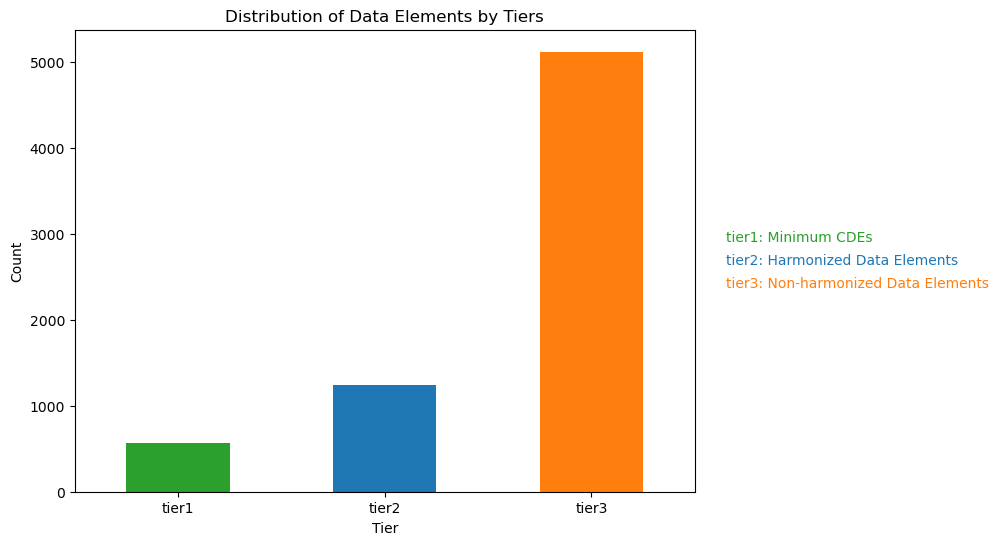

In [7]:
#
# Distribution of Data Elements by Tiers
tier_counts = df['tier'].value_counts()
tier_counts.sort_values(inplace=True)
plt.figure(figsize=(8, 6))
tier_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Data Elements by Tiers')
plt.xlabel('Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add descriptive text to the right of the chart
# description = "tier1: Minimum CDEs\ntier2: Harmonized Data Elements\ntier3: Non-harmonized Data Elements"
# plt.text(1.05, 0.5, description, transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Place each line of descriptive text with matching colors for each tier
plt.text(1.05, 0.55, "tier1: Minimum CDEs", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[0])
plt.text(1.05, 0.5, "tier2: Harmonized Data Elements", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[1])
plt.text(1.05, 0.45, "tier3: Non-harmonized Data Elements", transform=plt.gca().transAxes, ha="left", va="center", fontsize=10, color=colors[2])

plt.show()

## Distribution of Data Elements by Tier and Subproject

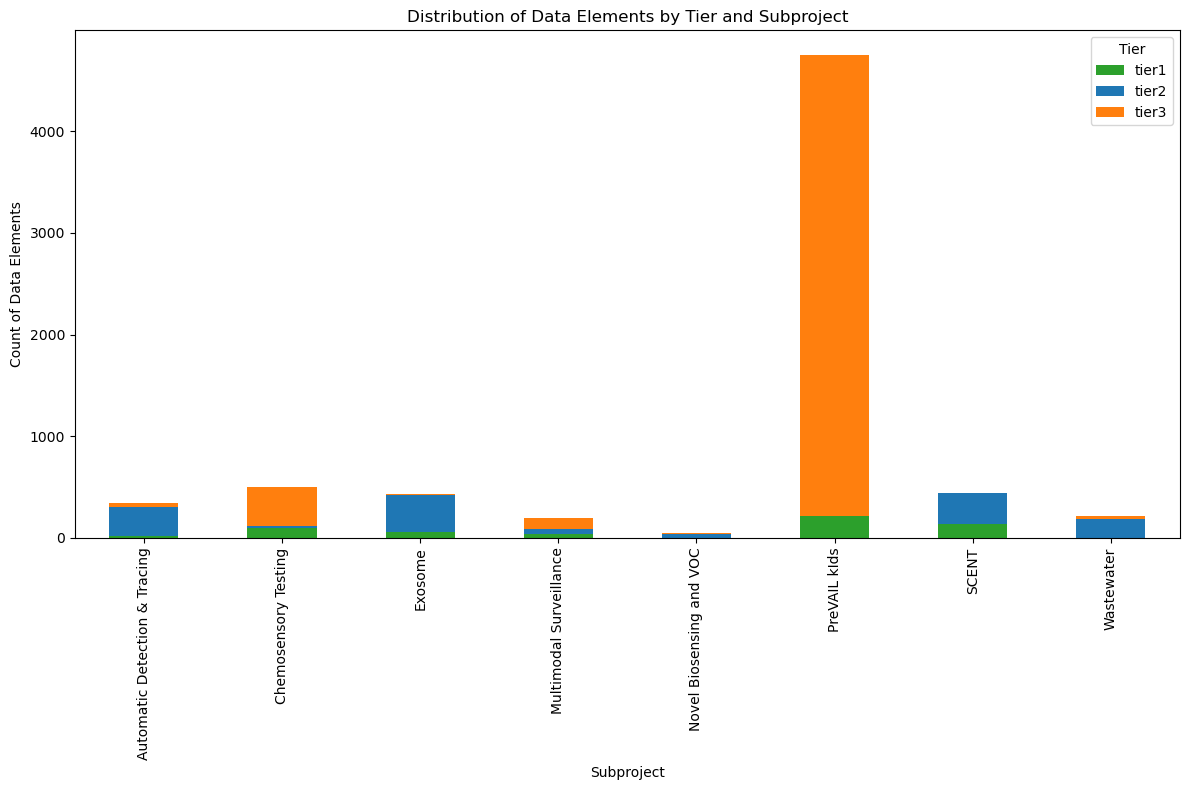

In [8]:
#
# Distribution of Data Elements by Tier and Subproject
tier_subproject_counts = df.groupby(['tier', 'subproject']).size().unstack().fillna(0)

tier_subproject_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Distribution of Data Elements by Tier and Subproject')
plt.xlabel('Subproject')
plt.ylabel('Count of Data Elements')
plt.legend(title='Tier')
plt.tight_layout()
plt.show()

## Distribution of Tier1 Data Elements (Minimum CDEs)
The dashed line indicates the maximum number of CDEs (46).

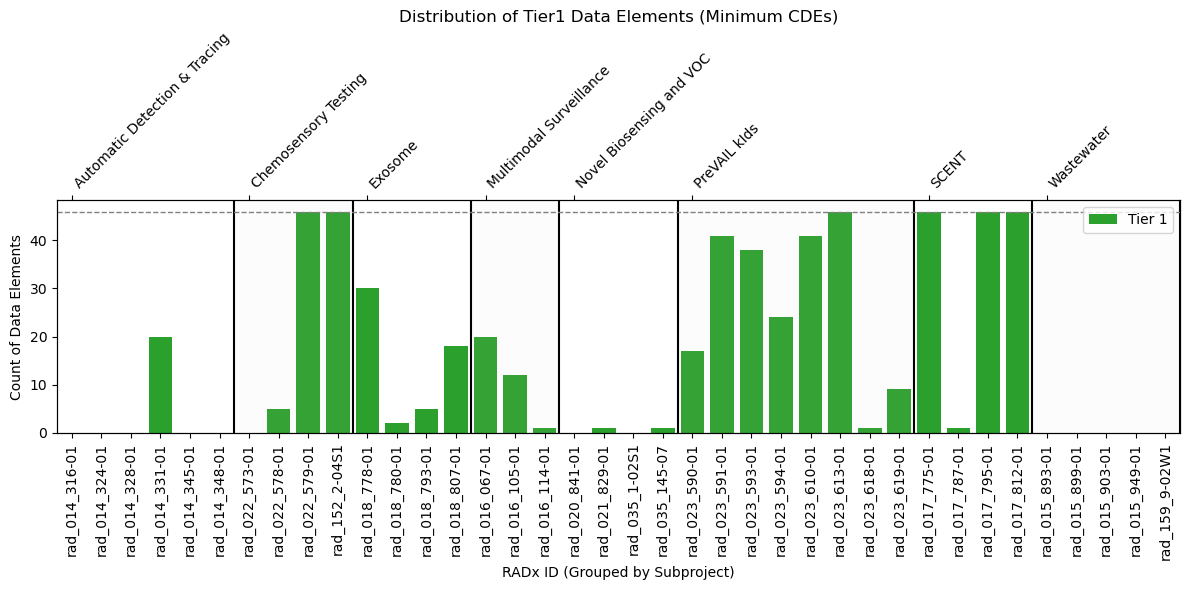

In [9]:
#
# Distribution of Tier1 Data Elements (Minimum CDEs)
tier_counts = df.pivot_table(index=['subproject', 'radx_id'], columns='tier', aggfunc='size', fill_value=0)

# Sort the radx_ids by subproject
tier_counts = tier_counts.sort_index(level='subproject')

# Reset the index for easier plotting
tier_counts = tier_counts.reset_index()

filtered_tier_counts = tier_counts

# Get the updated list of subprojects after filtering
filtered_subprojects = filtered_tier_counts['subproject'].unique()

# Set up the figure and axes again
fig, ax = plt.subplots(figsize=(12, 6))

# Create a second axis at the top for subproject labels
ax2 = ax.twiny()

# Clear the positions tracking for radx_ids
positions = []
current_pos = 0
subproject_positions = []

# Iterate over filtered subprojects and plot bars for each radx_id
for i, subproject in enumerate(filtered_subprojects):
    subproject_data = filtered_tier_counts[filtered_tier_counts['subproject'] == subproject]
    
    start_pos = current_pos  # Track the start position for the current subproject
    subproject_positions.append((start_pos + current_pos) / 2)  # Position for the subproject label
    
    for idx, row in subproject_data.iterrows():
        radx_id = row['radx_id']
        tier1_count = row.get('tier1', 0)
        
        # Stack the bars for tier1, tier2, tier3 with updated colors
        ax.bar(current_pos, tier1_count, color=tier_color_map['tier1'], label='Tier 1' if current_pos == 0 else "")
        
        # Keep track of position
        positions.append(current_pos)
        current_pos += 1
    
    # Add transparent gray shading for every second subproject
    if i % 2 == 1:
        ax.axvspan(start_pos - 0.5, current_pos - 0.5, facecolor='lightgray', alpha=0.05)
    
    # Add a vertical line to separate subprojects
    ax.axvline(current_pos - 0.5, color='black', linestyle='-')

# Customize the main chart
ax.set_xlabel('RADx ID (Grouped by Subproject)')
ax.set_ylabel('Count of Data Elements')
ax.set_title('Distribution of Tier1 Data Elements (Minimum CDEs)')
ax.set_xticks(positions)
ax.set_xticklabels(filtered_tier_counts['radx_id'], rotation=90)

# Remove extra space by setting x-axis limits
ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)

# Update the top axis to show subproject labels
ax2.set_xlim(ax.get_xlim())  # Align the two axes
ax2.set_xticks(subproject_positions)
ax2.set_xticklabels(filtered_subprojects, rotation=45, ha='left')

# Update the legend to show only once
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Add a horizontal dashed line at count = 46
ax.axhline(y=46, color='gray', linestyle='--', linewidth=1)

# Show the updated plot
plt.tight_layout()
plt.show()


## Distribution of Data Elements Tiers for Diagnostic Method and Wastewater Projects

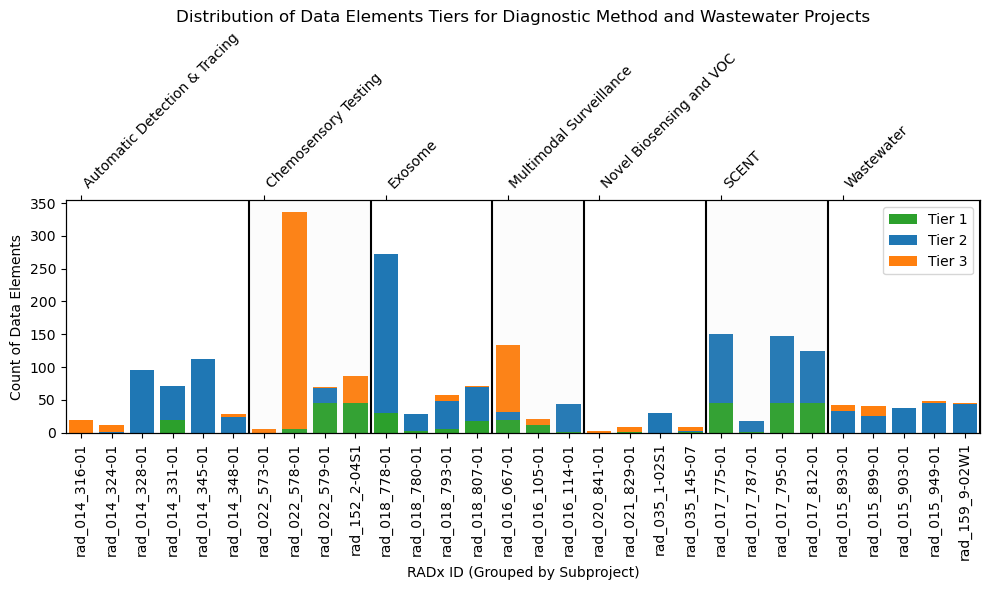

In [10]:
#
# Distribution of Data Elements Tiers for Diagnostic Method and Wastewater Projects
tier_counts = df.pivot_table(index=['subproject', 'radx_id'], columns='tier', aggfunc='size', fill_value=0)

# Sort the radx_ids by subproject
tier_counts = tier_counts.sort_index(level='subproject')

# Reset the index for easier plotting
tier_counts = tier_counts.reset_index()
# Exclude the specified subprojects: "PreVAIL kIds" and "Wastewater"
#filtered_tier_counts = tier_counts[~tier_counts['subproject'].isin(['PreVAIL kIds', 'Wastewater'])]
filtered_tier_counts = tier_counts[~tier_counts['subproject'].isin(['PreVAIL kIds'])]

# Get the updated list of subprojects after filtering
filtered_subprojects = filtered_tier_counts['subproject'].unique()

# Set up the figure and axes again
fig, ax = plt.subplots(figsize=(10, 6))

# Create a second axis at the top for subproject labels
ax2 = ax.twiny()

# Clear the positions tracking for radx_ids
positions = []
current_pos = 0
subproject_positions = []

# Iterate over filtered subprojects and plot bars for each radx_id
for i, subproject in enumerate(filtered_subprojects):
    subproject_data = filtered_tier_counts[filtered_tier_counts['subproject'] == subproject]
    
    start_pos = current_pos  # Track the start position for the current subproject
    subproject_positions.append((start_pos + current_pos) / 2)  # Position for the subproject label
    
    for idx, row in subproject_data.iterrows():
        radx_id = row['radx_id']
        tier1_count = row.get('tier1', 0)
        tier2_count = row.get('tier2', 0)
        tier3_count = row.get('tier3', 0)
        
        # Stack the bars for tier1, tier2, tier3 with updated colors
        ax.bar(current_pos, tier1_count, color=tier_color_map['tier1'], label='Tier 1' if current_pos == 0 else "")
        ax.bar(current_pos, tier2_count, bottom=tier1_count, color=tier_color_map['tier2'], label='Tier 2' if current_pos == 0 else "")
        ax.bar(current_pos, tier3_count, bottom=tier1_count + tier2_count, color=tier_color_map['tier3'], label='Tier 3' if current_pos == 0 else "")
        
        # Keep track of position
        positions.append(current_pos)
        current_pos += 1
    
    # Add transparent gray shading for every second subproject
    if i % 2 == 1:
        ax.axvspan(start_pos - 0.5, current_pos - 0.5, facecolor='lightgray', alpha=0.05)
    
    # Add a vertical line to separate subprojects
    ax.axvline(current_pos - 0.5, color='black', linestyle='-')

# Customize the main chart
ax.set_xlabel('RADx ID (Grouped by Subproject)')
ax.set_ylabel('Count of Data Elements')
ax.set_title('Distribution of Data Elements Tiers for Diagnostic Method and Wastewater Projects')
ax.set_xticks(positions)
ax.set_xticklabels(filtered_tier_counts['radx_id'], rotation=90)

# Remove extra space by setting x-axis limits
ax.set_xlim(min(positions) - 0.5, max(positions) + 0.5)

# Update the top axis to show subproject labels
ax2.set_xlim(ax.get_xlim())  # Align the two axes
ax2.set_xticks(subproject_positions)
ax2.set_xticklabels(filtered_subprojects, rotation=45, ha='left')

# Update the legend to show only once
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Show the updated plot
plt.tight_layout()
plt.show()

## Distribution of Data Elements Tiers for PreVAIL kIds Subproject

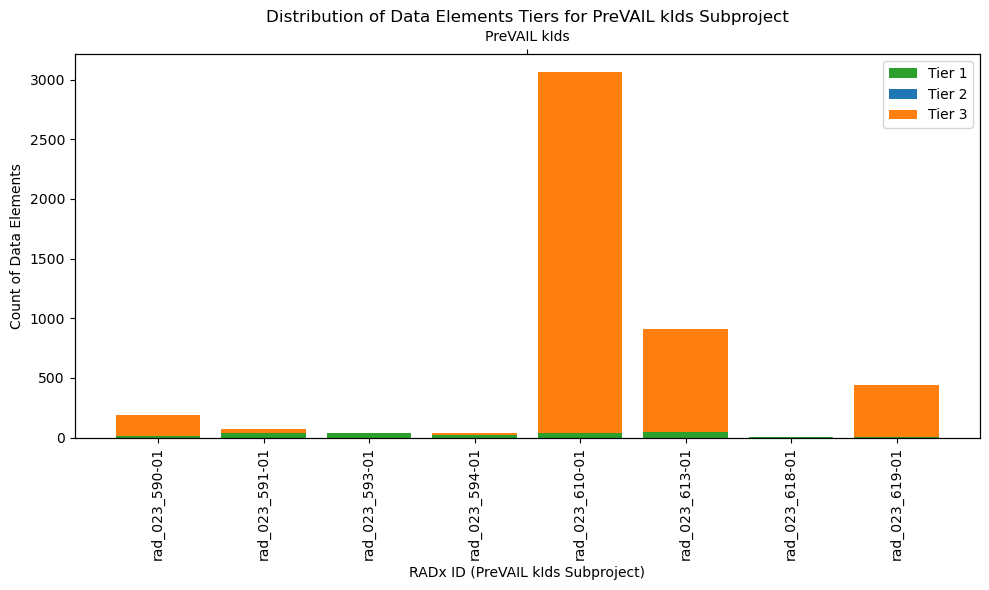

In [11]:
#
# Distribution of Data Elements Tiers for PreVAIL kIds Subproject
prevail_data = tier_counts[tier_counts['subproject'] == "PreVAIL kIds"]

# Get the list of RADx IDs in the PreVAIL kIds subproject
prevail_radx_ids = prevail_data['radx_id'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a second axis at the top for subproject labels (although there is only one subproject)
ax2 = ax.twiny()

# Clear the positions tracking for radx_ids
positions = []
current_pos = 0
subproject_positions = []

# Plot bars for each radx_id in "PreVAIL kIds"
for idx, row in prevail_data.iterrows():
    radx_id = row['radx_id']
    tier1_count = row.get('tier1', 0)
    tier2_count = row.get('tier2', 0)
    tier3_count = row.get('tier3', 0)
    
    # Stack the bars for tier1, tier2, tier3 with updated colors
    ax.bar(current_pos, tier1_count, color=tier_color_map['tier1'], label='Tier 1' if current_pos == 0 else "")
    ax.bar(current_pos, tier2_count, bottom=tier1_count, color=tier_color_map['tier2'], label='Tier 2' if current_pos == 0 else "")
    ax.bar(current_pos, tier3_count, bottom=tier1_count + tier2_count, color=tier_color_map['tier3'], label='Tier 3' if current_pos == 0 else "")
    
    # Keep track of position
    positions.append(current_pos)
    current_pos += 1

# Customize the main chart
ax.set_xlabel('RADx ID (PreVAIL kIds Subproject)')
ax.set_ylabel('Count of Data Elements')
ax.set_title('Distribution of Data Elements Tiers for PreVAIL kIds Subproject')
ax.set_xticks(positions)
ax.set_xticklabels(prevail_data['radx_id'], rotation=90)

# Update the top axis to show the subproject label (although only one)
ax2.set_xlim(ax.get_xlim())  # Align the two axes
ax2.set_xticks([sum(positions) / len(positions)])  # Center the label for the single subproject
ax2.set_xticklabels(["PreVAIL kIds"], rotation=0, ha='center')

# Update the legend to show only once
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Show the updated plot
plt.tight_layout()
plt.show()


## Top 25 Data Elements

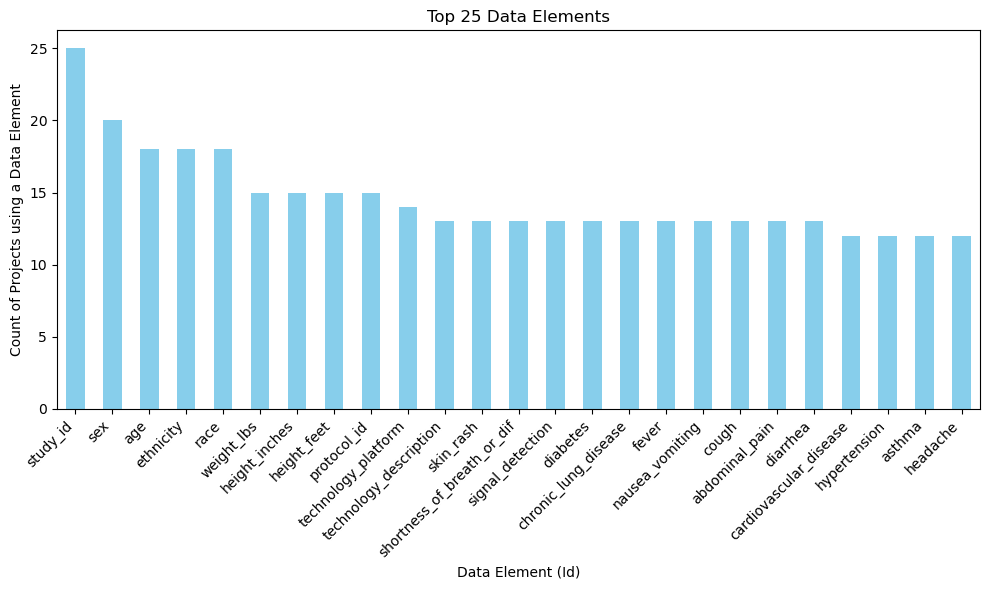

In [12]:
#
# Top 25 Data Elements
top_data_elements = df['Id'].value_counts().head(25)

# Plot a bar chart of the top 20 data elements
plt.figure(figsize=(10, 6))
top_data_elements.plot(kind='bar', color='skyblue')
plt.title('Top 25 Data Elements')
plt.xlabel('Data Element (Id)')
plt.ylabel('Count of Projects using a Data Element')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Number of Projects with Performance Metrics

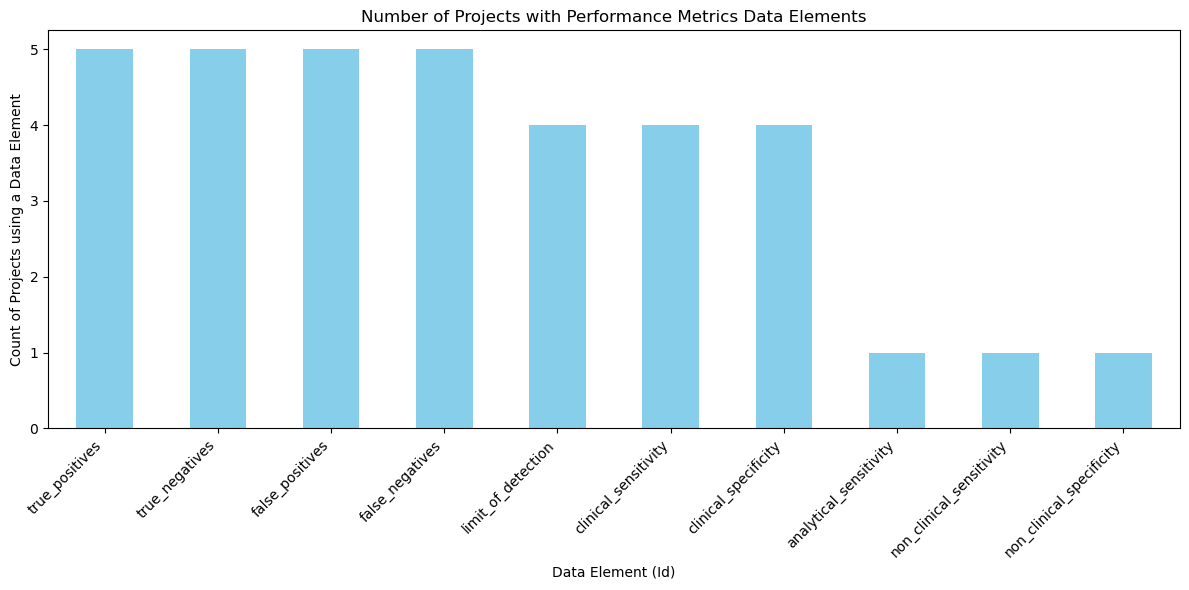

In [13]:
#
# Filter for exact matches in the 'Id' column using a non-capturing group with regex
selected_ids = r'^(?:true_positives|true_negatives|false_positives|false_negatives|clinical_specificity|clinical_sensitivity|non_clinical_specificity|non_clinical_sensitivity|analytical_sensitivity|limit_of_detection)$'
filtered_elements = df[df['Id'].str.contains(selected_ids, case=False, na=False, regex=True)]

# Count occurrences of each matching data element in 'Id'
filtered_counts = filtered_elements['Id'].value_counts()

# Plot a bar chart of the filtered data elements
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Projects with Performance Metrics Data Elements')
plt.xlabel('Data Element (Id)')
plt.ylabel('Count of Projects using a Data Element')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Projects that reported data for the Viral Quality Assurance Panel (VQA)

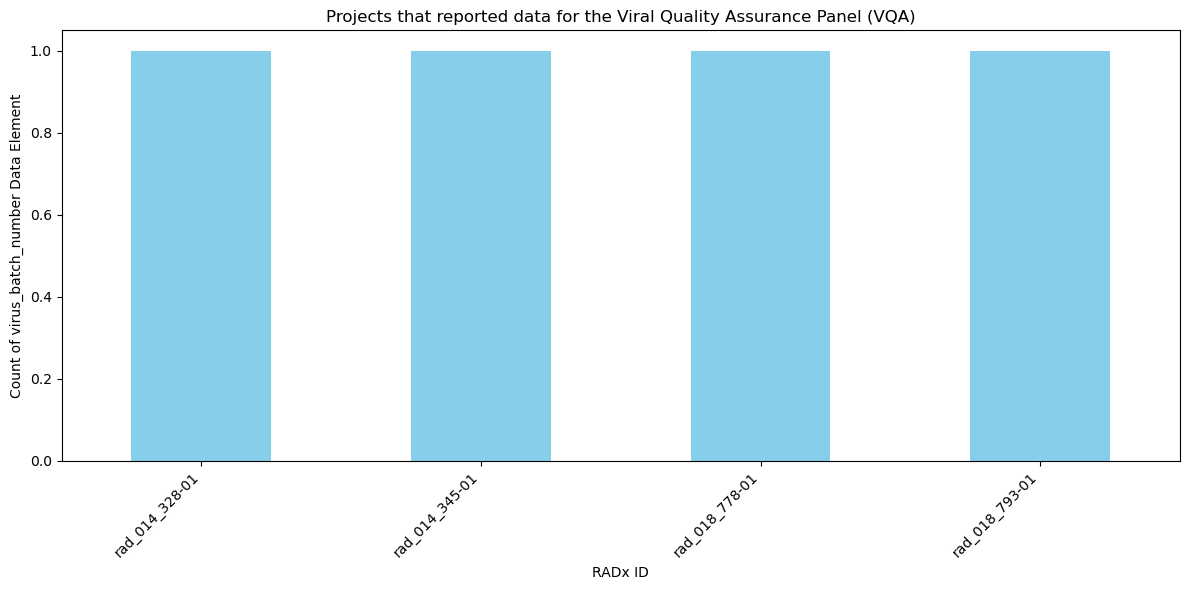

In [14]:
#
# Filter for rows where 'Id' is exactly 'virus_batch_number'
virus_batch_data = df[df['Id'] == 'virus_batch_number']

# Count occurrences of 'virus_batch_number' for each radx_id
radx_id_counts = virus_batch_data['radx_id'].value_counts()

# Filter out radx_ids with zero occurrences
radx_id_counts = radx_id_counts[radx_id_counts > 0]

# Plot a bar chart with radx_id on the x-axis and the count of 'virus_batch_number' on the y-axis
plt.figure(figsize=(12, 6))
radx_id_counts.plot(kind='bar', color='skyblue')
plt.title("Projects that reported data for the Viral Quality Assurance Panel (VQA)")
plt.xlabel('RADx ID')
plt.ylabel("Count of virus_batch_number Data Element")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
tier3 = df[df["tier"] == "tier3"]
n = tier3["Id"].nunique()
print(f"Number of total tier3 data elements: {tier3.shape[0]}")
print(f"Number of unique tier3 data elements: {n}")
tier3["Id"].value_counts().head(15)

Number of total tier3 data elements: 5123
Number of unique tier3 data elements: 5114


Id
wbc               2
ferritin          2
albumin           2
booster           2
booster_date      2
dx_covid          2
sodium            2
hgb               2
basophils         2
hsa-miR-4528      1
hsa-miR-671-5p    1
hsa-miR-15b-3p    1
hsa-miR-551a      1
hsa-miR-331-3p    1
hsa-miR-136-5p    1
Name: count, dtype: int64

In [16]:
tier3.head(100)

,Id,subproject,phs_id,project_num,radx_id,tier
0,aptamer_sequence,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
1,BLI_aptamer_concentration,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
2,BLI_protein_strain,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
3,BLI_protein_part,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
4,BLI_protein_origin,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
5,BLI_time,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
6,BLI_binding,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
7,BLI_fit,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
8,detection_type,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
9,detection_sample_ID,Automatic Detection & Tracing,phs002565.v1.p1,1U01AA029316-01,rad_014_316-01,tier3
